<a href="https://colab.research.google.com/github/Sonny2319/PracticasDeQuimica/blob/main/Termodin%C3%A1mica_vs_cin%C3%A9tica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1] Instalación de librerías

In [1]:
%%capture
!pip install rdkit
!pip install pyscf

In [2]:
# Importamos librerías
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True
from pyscf import gto, scf

[2] Estructuras

Isómero CIS

In [8]:
# representación SMILES del isómero CIS
smi_cis = "O(C(=O)[H])[H]"
# elemento de RDKit
cis = Chem.MolFromSmiles(smi_cis)
# agregamos sus hidrógenos
cis = Chem.AddHs(cis)
# etiquetamos sus átomos y generamos sus coordenadas usando una semilla
Chem.AllChem.EmbedMolecule(cis, useRandomCoords=False,randomSeed=1234)
# guardamos a un archivo XYZ
Chem.MolToXYZFile(cis, "cis.xyz")

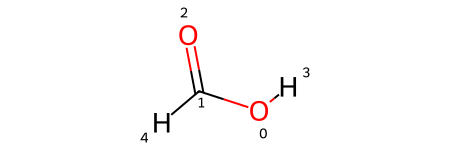

In [9]:
#visualizamos
cis

In [13]:
# visualizamos las coordenadas en el archivo XYZ
!cat cis.xyz

5

O      0.865201   -0.466197    0.230670
C     -0.441729   -0.042292    0.061021
O     -0.675289    1.181715    0.110647
H      1.502860    0.054160    0.852485
H     -1.251043   -0.727386   -0.110010


Isómero TRANS

In [14]:
smi_trans = "O(C(=O)[H])[H]"
trans = Chem.MolFromSmiles(smi_trans)
trans = Chem.AddHs(trans)
Chem.AllChem.EmbedMolecule(trans, useRandomCoords=False,randomSeed=1234)
Chem.MolToXYZFile(trans, "trans.xyz")

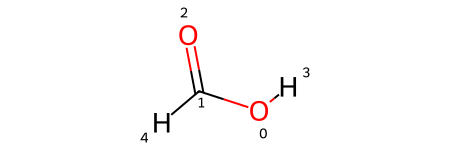

In [15]:
trans

In [16]:
!cat trans.xyz


5

O      0.865201   -0.466197    0.230670
C     -0.441729   -0.042292    0.061021
O     -0.675289    1.181715    0.110647
H      1.502860    0.054160    0.852485
H     -1.251043   -0.727386   -0.110010


Diedro = 90.0°

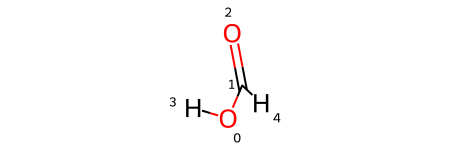

In [17]:
Chem.AllChem.SetDihedralDeg(cis.GetConformer(0),3,2,1,0,90.0)
Chem.MolToXYZFile(cis, "diedro90.xyz")
cis

In [18]:
!cat diedro90.xyz

5

O     -0.770885   -0.816099    1.160757
C     -0.441729   -0.042292    0.061021
O     -0.675289    1.181715    0.110647
H     -1.587577   -0.571590    1.741502
H      0.003393   -0.459106   -0.823133


[3] Cálculo de energía

CIS

In [19]:
cis = gto.M(atom="cis.xyz")

In [20]:
cis.basis = "6-31G"
mf_cis = cis.KS()
mf_cis.xc = 'b3lyp'

In [21]:
resultado_cis = mf_cis.kernel()
resultado_cis

converged SCF energy = -187.124899157471


-187.1248991574709

Diedro 90

In [23]:
cis_90 = gto.M(atom="diedro90.xyz")

In [24]:
cis_90.basis = "6-31G"
mf_90 = cis_90.KS()
mf_90.xc = 'b3lyp'

In [25]:
resultado_cis_90 = mf_90.kernel()
resultado_cis_90

converged SCF energy = -187.124898824245


-187.12489882424546

TRANS

In [26]:
trans = gto.M(atom="trans.xyz")

In [27]:
trans.basis = "6-31G"
mf_trans = trans.KS()
mf_trans.xc = 'b3lyp'

In [28]:
resultado_trans= mf_trans.kernel()
resultado_trans

converged SCF energy = -187.124899157471


-187.12489915747082

[4]. Gráfica

In [29]:
%%capture
!pip install git+https://github.com/giacomomarchioro/PyEnergyDiagrams

In [30]:
import matplotlib.pyplot as plt
from energydiagram import ED

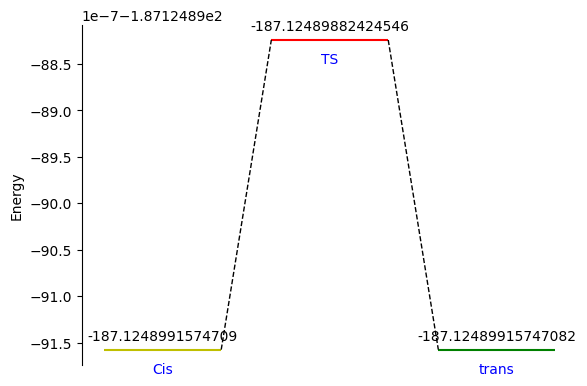

In [31]:
diagram = ED()
diagram.add_level(resultado_cis,'Cis',color='y')
diagram.add_level(resultado_cis_90,'TS',color='r')
diagram.add_level(resultado_trans,'trans',color='g')

diagram.add_link(0,1)
diagram.add_link(1,2)
diagram.plot(ylabel="Energy") # / ")

Cinética:

In [33]:
E_activacion = resultado_cis_90 - resultado_cis
E_activacion

3.3322544368274976e-07

Termodinámica

In [34]:
entalpia = resultado_trans - resultado_cis
if entalpia>0:
  print("La reacción es endotérmica")
else:
    print("La reacción es exotérmica")

La reacción es endotérmica
